In [5]:
import pandas as pd
import os,sys
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'gender_submission.csv': b'PassengerId,Survived\r\n892,0\r\n893,1\r\n894,0\r\n895,0\r\n896,1\r\n897,0\r\n898,1\r\n899,0\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,0\r\n909,0\r\n910,1\r\n911,1\r\n912,0\r\n913,0\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,0\r\n920,0\r\n921,0\r\n922,0\r\n923,0\r\n924,1\r\n925,1\r\n926,0\r\n927,0\r\n928,1\r\n929,1\r\n930,0\r\n931,0\r\n932,0\r\n933,0\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,0\r\n957,1\r\n958,1\r\n959,0\r\n960,0\r\n961,1\r\n962,1\r\n963,0\r\n964,1\r\n965,0\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,0\r\n973,0\r\n974,0\r\n975,0\r\n976,0\r\n977,0\r\n978,1\r\n979,1\r\n980,1\r\n981,0\r\n982,1\r\n983,0\r\n984,1\r\n985,0\r\n986,0\r\n987,0\r\n988,1\r\n989,0\r\n990,1\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,1\r\n997

In [42]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [82]:
df_train['Fare'].unique()
#$7와 $130은 차이가 큼 그럼 어떻게? -> 정규화

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [43]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i >0 else 0)
#정규화?를 하기위한 표준화?라고 함 > 함수 log 사용하여 값들의 편차를 줄임 
#log10 기준으로 숫자 변환

In [44]:
df_train['Fare']

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

In [45]:
#nan값은 어떻게 할 것인가? 
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [46]:
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i >0 else 0)

In [87]:
df_test.Fare.unique()

array([2.05786033, 1.94591015, 2.27083639, 2.15900336, 2.50858249,
       2.22191719, 2.03198299, 3.36729583, 1.97812838, 3.18428438,
       2.06633097, 3.25809654, 4.40996641, 4.11373861, 3.32218303,
       2.51365606, 1.97754723, 2.07002232, 4.08429423, 1.15398392,
       3.45578973, 4.11707102, 5.56977478, 2.67414865, 4.12679884,
       3.41772668, 3.07635328, 3.44998755, 3.02407675, 3.15487049,
       4.05612335, 2.08567209, 2.2512918 , 4.0341663 , 2.5965002 ,
       3.27902975, 2.06051353, 2.56494936, 3.96184502, 3.39114705,
       2.04769284, 4.33456415, 2.76631911, 4.09434456, 2.71026774,
       3.13549422, 5.57215403, 2.74593669, 3.37159691, 2.03470565,
       2.77881927, 2.60268969, 2.04446182, 3.04452244, 2.06422638,
       3.74714836, 3.35121901, 5.354225  , 3.24649099, 2.72430406,
       5.40168229, 2.37101914, 2.67098503, 2.63188884, 2.05091346,
       3.95124372, 2.05358513, 4.36754731, 2.06104842, 4.01533202,
       2.14202894, 3.1146258 , 2.05678685, 2.16475878, 2.71109

In [88]:
df_train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [47]:
#A to Z 모든 문자열(\) 검색하는데 . 앞에 있는 것만 
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [48]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [49]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [50]:
df_train.groupby('Initial')[['Survived']].mean()

,Survived
Initial,
Master,0.575000
Miss,0.704301
Mr,0.162571
Mrs,0.795276
Other,0.111111


In [51]:
df_train.Age.isnull().sum()

177

In [52]:
df_test.Age.isnull().sum()

86

In [53]:
df_train.groupby('Initial')[['Age']].mean().round()

,Age
Initial,
Master,5.0
Miss,22.0
Mr,33.0
Mrs,36.0
Other,46.0


In [54]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [55]:
df_train['Embarked'].isnull().sum()

2

In [56]:
df_train.groupby('Embarked')[['Survived']].count()

,Survived
Embarked,
C,168
Q,77
S,644


In [57]:
df_train['Embarked'].fillna('S', inplace = True)

In [58]:
df_train['Age_cat'] = df_train['Age_cat'].apply(Age_cat(df_train['Age']))

ValueError: ignored

In [56]:
def Age_cat(i):
  for i in range(len(df_train['Age'])):
    if df_train['Age'] < 11 :
      return 0
    elif 10 < df_train['Age'] < 21 :
      return 1
    elif 20 < df_train['Age'] < 31 :
      return 2
    elif 30 < df_train['Age'] < 41 :
      return 3
    elif 40 < df_train['Age'] < 51 :
      return 4
    elif 50 < df_train['Age'] < 61 :
      return 5
    elif 60 < df_train['Age'] < 71 :
      return 6
    else: return 7

In [54]:
df_train['Age_cat'].unique()

array([2])

In [46]:
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 33.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 36.  , 34.  , 15.  ,
       28.  ,  8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,
        7.  , 49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  ,
       32.  , 16.  , 25.  ,  0.83, 30.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [58]:
def category_age(x):
  if x < 10:
    return 0
  elif x < 20:
    return 1
  elif x < 30:
    return 2
  elif x < 40:
    return 3
  elif x < 50:
    return 4
  elif x < 60:
    return 5
  elif x < 70:
    return 6
  else: 
    return 7

In [59]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [60]:
df_train.drop(['Age'],axis =1, inplace = True)
df_test.drop(['Age'],axis =1, inplace = True)

In [61]:
df_train['Age_cat'].unique()

array([2, 3, 5, 0, 1, 4, 6, 7])

In [62]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [63]:
df_train['Sex'] = df_train['Sex'].map({'female':0,'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0,'male':1})

In [64]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [65]:
df_train['Initial']
#이렇게 간격이 짧은 숫자로 바꿔야지 머신런닝 학습할 때 효율적임 

0      2
1      3
2      1
3      3
4      2
      ..
886    4
887    1
888    1
889    2
890    2
Name: Initial, Length: 891, dtype: int64

In [79]:
df_train['Initial']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: Initial, Length: 891, dtype: float64

In [ ]:
df_train['FamilySize'] = df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize'] = df_train['SibSp']+df_train['Parch']+1 

In [69]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]
heatmap_data

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
0,0,3,1,1.981001,2,2,2,2
1,1,1,0,4.266662,0,2,3,3
2,1,3,0,2.070022,2,1,1,2
3,1,1,0,3.972177,2,2,3,3
4,0,3,1,2.085672,2,1,2,3
...,...,...,...,...,...,...,...,...
886,0,2,1,2.564949,2,1,4,2
887,1,1,0,3.401197,2,1,1,1
888,0,3,0,3.154870,2,4,1,2
889,1,1,1,3.401197,0,1,2,2


<Axes: title={'center': 'PCofF'}>

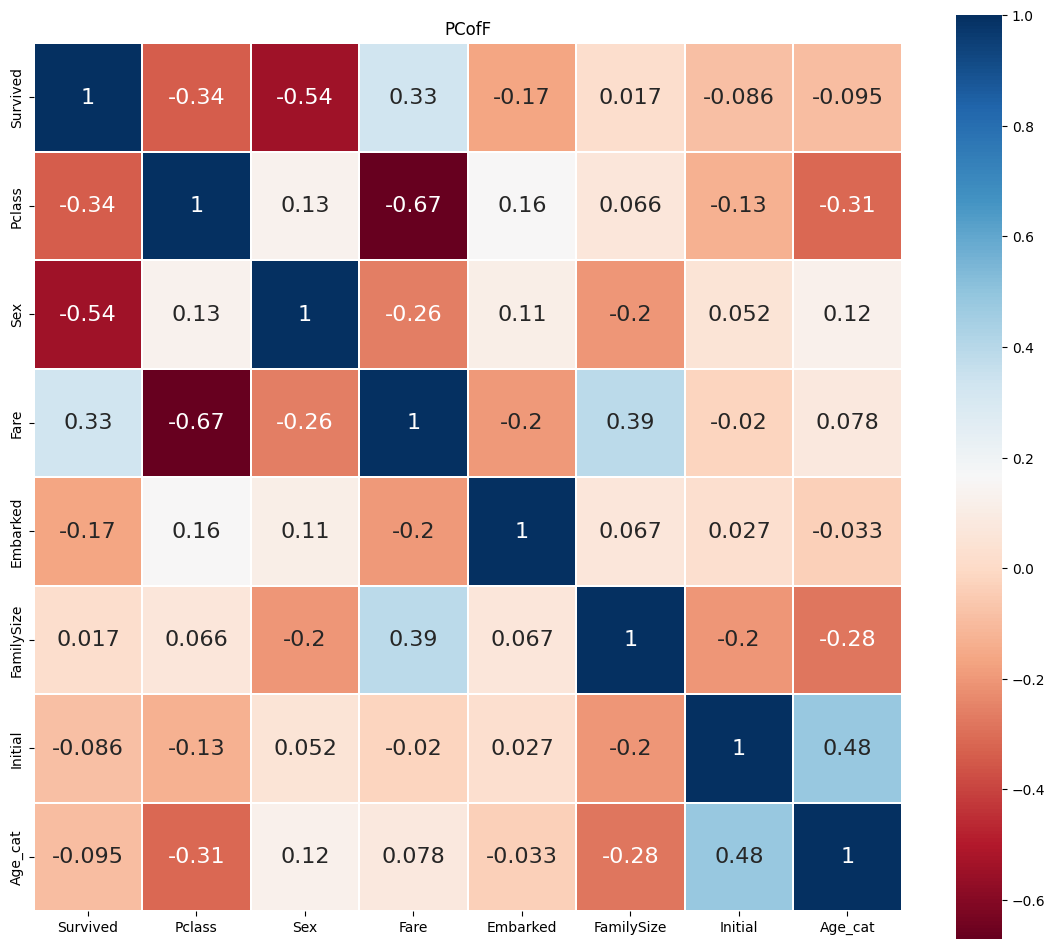

In [70]:
Facolormap = plt.cm.RdBu
plt.figure(figsize =(14,12))
plt.title('PCofF')
sns.heatmap(heatmap_data.astype(float).corr(), linewidths =0.1,vmax=1.0,square=True,cmap=colormap,
            annot=True,annot_kws = {'size':16})

In [71]:
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix = 'Initial')
#숫자를 0과 1로 바꿈 > 기존 initial 값 0~5를 컬럼을 inital0~5로 해서 값을 0 1로 바꿈 

In [72]:
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = 'Initial')

In [73]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')

In [74]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis = 1, inplace = True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis = 1, inplace = True)

In [36]:
df_train.head()
#전처리하는 과정 중 카테고리화/범주화라고 볼 수 있음 

,Survived,Pclass,Sex,Fare,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,0,3,1,1.981001,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,3,0,0,1,0,0,0,0,1


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [75]:
train_input = df_train.drop('Survived', axis =1 )
train_target = df_train['Survived']
test_input = df_test.copy()
test_target = pd.DataFrame(pd.read_csv('gender_submission.csv'))[['Survived']]
train_input.shape, test_input.shape

((891, 13), (418, 13))

In [85]:
train_input

,Pclass,Sex,Fare,Age_cat,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,0,4.266662,3,2,0,0,0,1,0,1,0,0
2,3,0,2.070022,2,1,0,1,0,0,0,0,0,1
3,1,0,3.972177,3,2,0,0,0,1,0,0,0,1
4,3,1,2.085672,3,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,2.564949,2,1,0,0,0,0,1,0,0,1
887,1,0,3.401197,1,1,0,1,0,0,0,0,0,1
888,3,0,3.154870,2,4,0,1,0,0,0,0,0,1
889,1,1,3.401197,2,1,0,0,1,0,0,1,0,0


In [123]:
knn = KNeighborsClassifier()
knn.fit(train_input,train_target)
pred = knn.predict(test_input)
knn_score = accuracy_score(test_target, pred)

In [124]:
print('정확도:', accuracy_score(test_target.values.ravel(),pred))
test = pd.DataFrame({'prediction':pred, 'ground_truth':test_target.values.ravel()})

정확도: 0.861244019138756


In [78]:
test[:20]

,prediction,ground_truth
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [83]:
k_list = range(1,101,2)
accuracy_knn = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(train_input, train_target)
  scores = cross_val_score(knn, train_input, train_target.values.ravel(), cv=10, scoring = 'accuracy')
  accuracy_knn.append(scores.mean())

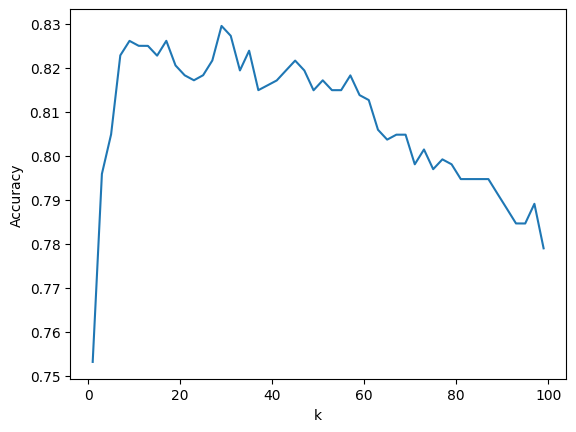

가장 높음 정확률을 가진 k값은 :  29


In [84]:
plt.plot(k_list,accuracy_knn)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()
k = k_list[accuracy_knn.index(max(accuracy_knn))]
print('가장 높음 정확률을 가진 k값은 : ',k)

In [89]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(train_input, train_target)
pred = knn.predict(test_input)
knn_score = accuracy_score

In [90]:
print('정확도:',accuracy_score(test_target.values.ravel(), pred))
test = pd.DataFrame({'prediction':pred,'ground_truth':test_target.values.ravel()})
test[:20]

정확도: 0.9090909090909091


,prediction,ground_truth
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [86]:
from sklearn.naive_bayes import GaussianNB

In [91]:
model = GaussianNB()
model.fit(train_input, train_target)
pred = model.predict(test_input)
nb_score = accuracy_score(test_target, pred)

In [92]:
print('정확도:',accuracy_score(test_target.values.ravel(), pred))
test = pd.DataFrame({'prediction':pred,'ground_truth':test_target.values.ravel()})
test[:20]

정확도: 0.9066985645933014


,prediction,ground_truth
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [95]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [96]:
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)

DecisionTreeClassifier()

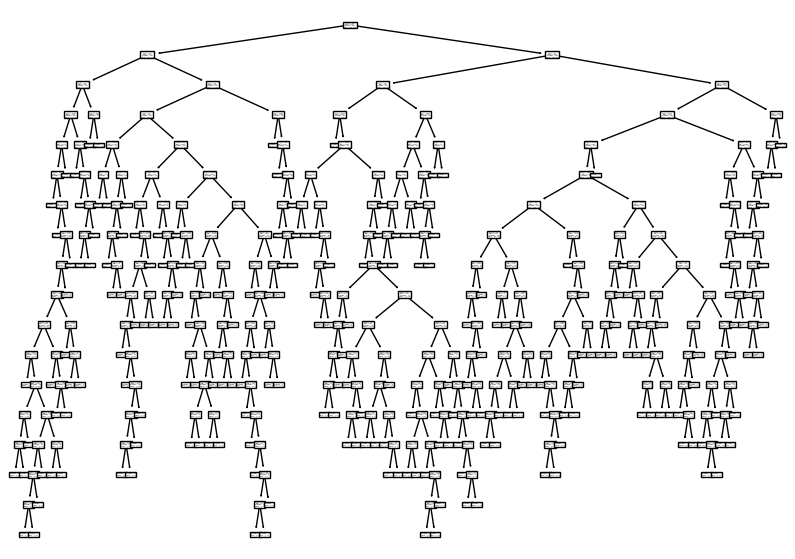

In [97]:
plt.figure(figsize=(10,7))
plot_tree(dt, filled=True)
plt.show()

In [98]:
dt_train_pred = dt.predict(train_input)
dt_test_pred = dt.predict(test_input)
dt_score = accuracy_score(test_target, dt_test_pred)

In [100]:
print('의사결정나무의 train데이터 정확도',accuracy_score(train_target, dt_train_pred))
print('의사결정나무의 test데이터 정확도',dt_score)

의사결정나무의 train데이터 정확도 0.9539842873176206
의사결정나무의 test데이터 정확도 0.7966507177033493


In [101]:
print('정확도:', dt_score)
test = pd.DataFrame({'prediction':dt_test_pred, 'ground_truth':test_target.values.ravel()})
test[:20]

정확도: 0.7966507177033493


,prediction,ground_truth
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,0,1
7,0,0
8,0,1
9,0,0


In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf_clf = RandomForestClassifier()
rf_clf.fit(train_input, train_target)
rf_clf_pred = rf_clf.predict(test_input)

In [107]:
rf_scores = accuracy_score(test_target,rf_clf_pred)
print(rf_scores)
df_rf = pd.DataFrame({'rf_pred':rf_clf_pred, 'truth':test_target.values.ravel()})
df_rf[:20]

0.8253588516746412


,rf_pred,truth
0,0,0
1,0,1
2,0,0
3,0,0
4,1,1
5,0,0
6,0,1
7,0,0
8,1,1
9,0,0


In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
lr = LogisticRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))

0.8316498316498316


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
lr_scores = lr.score(test_input, test_target)
print(lr_scores)
lr_test_pred = lr.predict(test_input)

0.8995215311004785


In [113]:
print('정확도:',accuracy_score(test_target,lr_test_pred))
test = pd.DataFrame({'prediction':lr_test_pred,'ground_truth':test_target.values.ravel()})
test[:20]

정확도: 0.8995215311004785


,prediction,ground_truth
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [122]:
knn_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

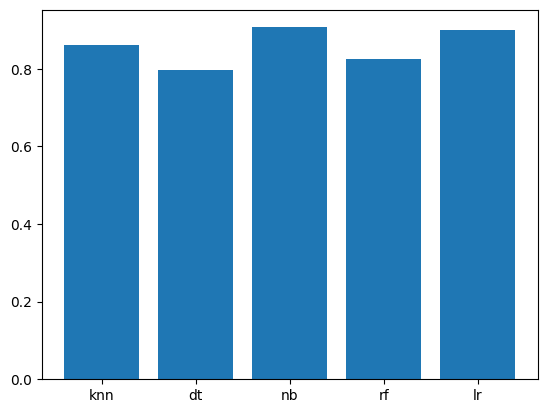

knn의 정확도 = 0.861244019138756
의사결정나무의 정확도 = 0.7966507177033493
나이브베이즈의 정확도 = 0.9066985645933014
랜덤포레스트의 정확도 = 0.8253588516746412
로지스틱회귀분석의 정확도 = 0.8995215311004785


In [125]:
x = np.arange(5)
plt.bar(x,height=[knn_score, dt_score, nb_score, rf_scores, lr_scores])
plt.xticks(x,['knn','dt','nb','rf','lr'])
plt.show()
print('knn의 정확도 =', knn_score)
print('의사결정나무의 정확도 =', dt_score)
print('나이브베이즈의 정확도 =', nb_score)
print('랜덤포레스트의 정확도 =', rf_scores)
print('로지스틱회귀분석의 정확도 =', lr_scores)